# Importing Stuff

In [41]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import Imputer,Normalizer,scale,PolynomialFeatures
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import recall_score, precision_score,accuracy_score,r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# Graph Functions

In [4]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

# Importing Data

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

full = train.append(test,ignore_index = True,sort = False)

titanic = full[:891]

print('Datasets :', 'full :',full.shape,'titanic :',titanic.shape)

Datasets : full : (1309, 12) titanic : (891, 12)


# Analysing Data


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.wa

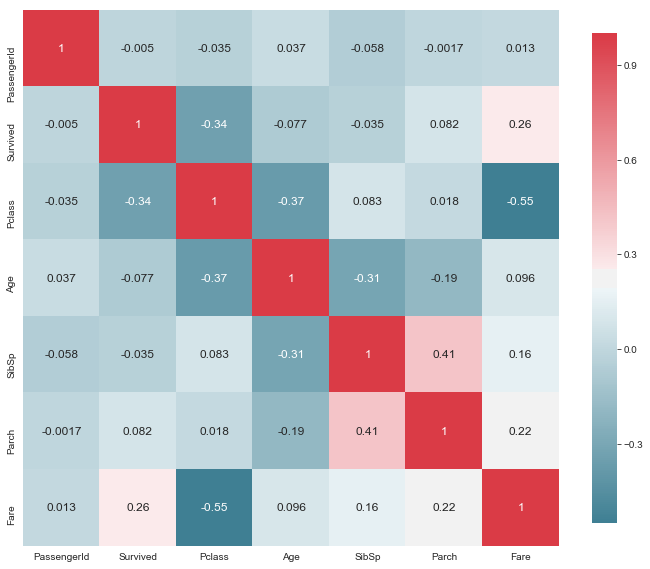

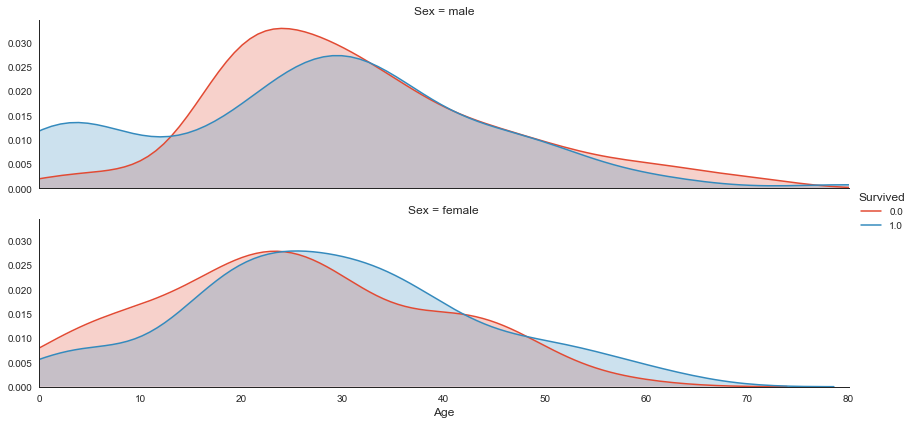

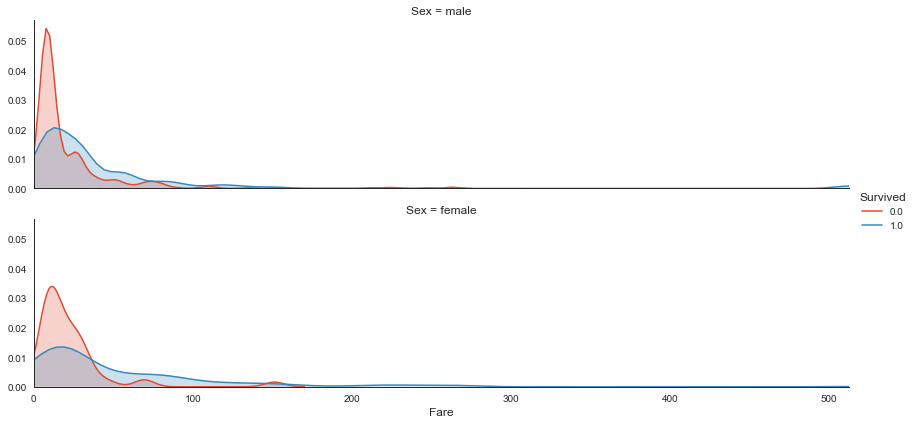

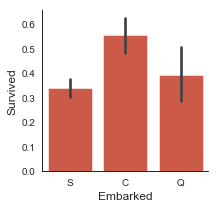

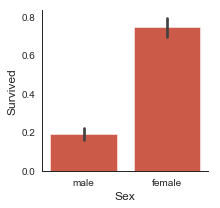

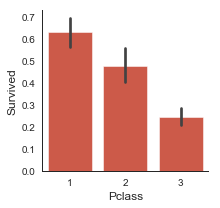

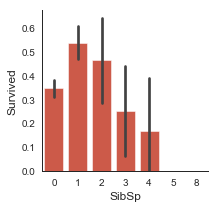

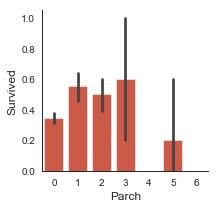

In [7]:
titanic.head()
titanic.describe()
plot_correlation_map(titanic)
plot_distribution(titanic,var ='Age',target='Survived',row = 'Sex')
plot_distribution(titanic,var ='Fare',target='Survived',row = 'Sex')
plot_categories(titanic,cat='Embarked',target='Survived')
plot_categories(titanic,cat='Sex',target='Survived')
plot_categories(titanic,cat='Pclass',target='Survived')
plot_categories(titanic,cat='SibSp',target='Survived')
plot_categories(titanic,cat='Parch',target='Survived')


<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
5              6       0.0       3   
6              7       0.0       1   
7              8       0.0       3   
8              9       1.0       3   
9             10       1.0       2   
10            11       1.0       3   
11            12       1.0       1   
12            13       0.0       3   
13            14       0.0       3   
14            15       0.0       3   
15            16       1.0       2   
16            17       0.0       3   
17            18       1.0       2   
18            19       0.0       3   
19            20       1.0       3   
20            21       0.0       2   
21            22       1.0       2   
22            23       1.0       3   
23            24       1.0       1   
24            25  

# Preparing Data

In [8]:
sex = pd.Series(np.where(full.Sex == 'male',1,0),name='Sex')
embarked = pd.get_dummies(full.Embarked,prefix='Embarked')
pclass = pd.get_dummies(full.Pclass,prefix='Pclass')

imputed = pd.DataFrame()
imputed['Age'] = full.Age.fillna(full.Age.mean())
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())

imputed

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,29.881138,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708


# Feature Eng.

In [58]:
title = pd.DataFrame()
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }


title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )
title.head()

cabin = pd.DataFrame()
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )
cabin.head()

def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'
ticket = pd.DataFrame()
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )
ticket.head()

family = pd.DataFrame()
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
family.head()
ticket.head()


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [168]:


full_X = pd.concat( [ imputed , embarked ,pclass, family , sex ] , axis=1 )
full_X.head()

train_valid_X = full_X[:891]
train_valid_y = titanic.Survived

train_X,test_X,train_y,test_y = train_test_split(train_valid_X,train_valid_y)
print (full_X.shape , train_X.shape , test_X.shape , train_y.shape , test_y.shape , test_X.shape)

(1309, 13) (668, 13) (223, 13) (668,) (223,) (223, 13)


# Feature Importance

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.811377245508982
0.905688622754491
0.9865269461077845
1 0.8083832335329342
2 0.8353293413173652
3 0.811377245508982
4 0.874251497005988
5 0.905688622754491
6 0.7649700598802395
7 0.9865269461077845


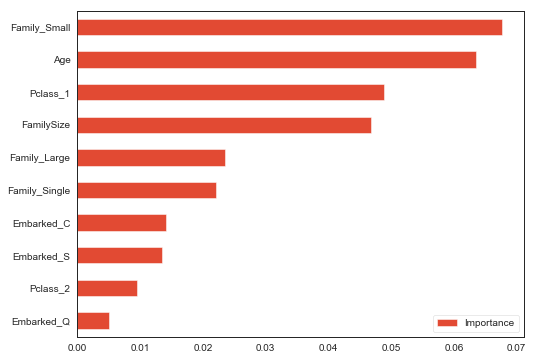

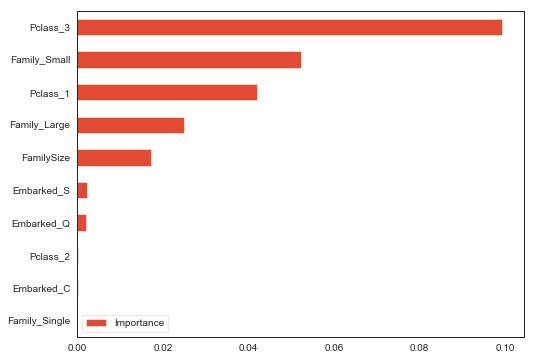

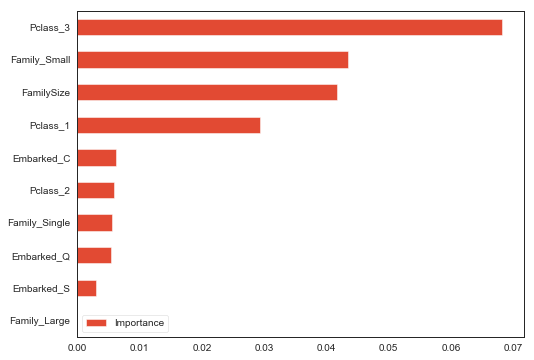

In [171]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors = 3)
#model3 = PolynomialFeatures(3)
model3 = RandomForestClassifier(n_estimators=100,max_depth = 3,n_jobs = -1)
model4 = SVC()
model5 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3)
model6 = GaussianNB()
model7 = DecisionTreeClassifier()

model1.fit(train_X,train_y)
model2.fit(train_X,train_y)
model3.fit(train_X,train_y)
model4.fit(train_X,train_y)
model5.fit(train_X,train_y)
model6.fit(train_X,train_y)
model7.fit(train_X,train_y)

plot_model_var_imp(model3,train_X,train_y)
plot_model_var_imp(model5,train_X,train_y)
plot_model_var_imp(model7,train_X,train_y)

print('1',model1.score(train_X,train_y))
print('2',model2.score(train_X,train_y))
print('3',model3.score(train_X,train_y))
print('4',model4.score(train_X,train_y))
print('5',model5.score(train_X,train_y))
print('6',model6.score(train_X,train_y))
print('7',model7.score(train_X,train_y))



In [172]:
pred1 = model1.predict(test_X)
pred2 = model2.predict(test_X)
pred3 = model3.predict(test_X)
pred4 = model4.predict(test_X)
pred5 = model5.predict(test_X)
pred6 = model6.predict(test_X)
pred7 = model7.predict(test_X)

print('1', accuracy_score(test_y,pred1),recall_score(test_y,pred1),precision_score(test_y,pred1),r2_score(test_y,pred1))
print('2', accuracy_score(test_y,pred2),recall_score(test_y,pred2),precision_score(test_y,pred2),r2_score(test_y,pred2))
print('3', accuracy_score(test_y,pred3),recall_score(test_y,pred3),precision_score(test_y,pred3),r2_score(test_y,pred3))
print('4', accuracy_score(test_y,pred4),recall_score(test_y,pred4),precision_score(test_y,pred4),r2_score(test_y,pred4))
print('5', accuracy_score(test_y,pred5),recall_score(test_y,pred5),precision_score(test_y,pred5),r2_score(test_y,pred5))
print('6', accuracy_score(test_y,pred6),recall_score(test_y,pred6),precision_score(test_y,pred6),r2_score(test_y,pred6))
print('7', accuracy_score(test_y,pred7),recall_score(test_y,pred7),precision_score(test_y,pred7),r2_score(test_y,pred7))

1 0.8116591928251121 0.7191011235955056 0.7901234567901234 0.21465705181955352
2 0.7354260089686099 0.6067415730337079 0.6923076923076923 -0.10321985577729387
3 0.8161434977578476 0.6067415730337079 0.9 0.23335569344289753
4 0.7533632286995515 0.6179775280898876 0.7236842105263158 -0.028425289283917854
5 0.8475336322869955 0.7191011235955056 0.8767123287671232 0.3642461848063052
6 0.7623318385650224 0.6966292134831461 0.7045454545454546 0.00897199396276993
7 0.8251121076233184 0.7640449438202247 0.7906976744186046 0.2707529766895854


0.9026946107784432 0.8475336322869955
Optimal number of features :  4


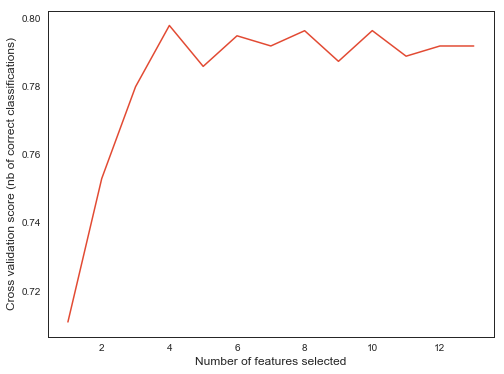

In [173]:
rfecv = RFECV( estimator = model5 , step = 1 , cv = StratifiedKFold( 2 ) , scoring='accuracy')
rfecv.fit( train_X , train_y )

print (rfecv.score( train_X , train_y ) , rfecv.score( test_X , test_y ))
print( "Optimal number of features : " , rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

In [176]:
valid_X = full_X[ 891: ]
valid_Y = model5.predict( valid_X ).astype(int)
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': valid_Y })

test.shape
test
test.to_csv( 'titanic_pred.csv' , index = False)
tt = pd.read_csv('titanic_pred.csv')
tt

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
